# Breast Cancer Prediction

##### 
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). 

In [1]:
# import necessary libraries
from sklearn import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [2]:
original_data = pd.read_csv("breast-cancer.csv")
# print(original_data.head(5))

In [3]:
data_copy = original_data.copy(deep=True)
print(len(data_copy))
# print(data_copy)

569


### Check the data

In [4]:
# check the data
columns = list(data_copy.columns)
print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [5]:
#check the data on missing or NAN values

data_copy.isnull().mean()
#data_copy.dtypes

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

### Normalize the training data

In [6]:
x_features = data_copy.iloc[:,2:]
# print(x_features)
y_target = data_copy["diagnosis"]
# print(y_target.head(20))
y_target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data_array = scaler.fit_transform(x_features)
# print(scaled_data_array)

scaled_data = pd.DataFrame(scaled_data_array, columns=x_features.columns, index=x_features.index)
# print(scaled_data)

In [8]:
# label target values
y = y_target.replace({"M": 1, "B": 0})
print(y.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


### Split the dataset into training set, validation set and test set (ratio: 70/20/10)

>**random_state = some_number** guarantees, that every time we run the code, we will get the same output,
which we made at the first time split.

In [9]:
#we split the dataset using sklearn into 70-20-10
 
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    scaled_data, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = model_selection.train_test_split(
    X_train, y_train, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = np.asarray(X_train), np.asarray(X_val), np.asarray(y_train), np.asarray(y_val)
X_test, y_test = np.asarray(X_test), np.asarray(y_test)


In [10]:
print(f"Training set: (X_train,y_train): {len(X_train),len(y_train)}, \nTest set: (X_test, y_test): {len(X_test), len(y_test)}")
print(f"Validation set: (X_val, y_val): {len(X_val), len(y_val)}")

Training set: (X_train,y_train): (409, 409), 
Test set: (X_test, y_test): (114, 114)
Validation set: (X_val, y_val): (46, 46)


In [11]:
#check the shape of each set

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (409, 30)
y_train shape: (409,)
X_val shape: (46, 30)
y_val shape: (46,)
X_test shape: (114, 30)
y_test shape: (114,)


### Creat logistic regression model (Sigmoid function)

In [12]:
#define logistic regression function

def sigmoid_function(x, w, b):
    f_wb = np.zeros(x.shape[0])
    g_z = np.zeros(x.shape[0])
    for i in range(len(x)):
        f_wb[i] = np.dot(x[i], w) + b
        g_z[i] = 1/(1 + math.e**(-f_wb[i]))
    return g_z   
    

In [13]:
#check if sigmoid function is working
w=np.zeros(X_train.shape[-1])
b=0

In [14]:
sigmoid_output = sigmoid_function(X_train, w, b)
print(sigmoid_output)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

### Cost function (Loss function)

>**Loss** is the measure of the difference of a single example to its target value while                                
>**Cost** is the measure of the losses over the training set

In [15]:
#define cost function for logistic regression

def cost_function_for_log_reg(x, y, w, b):
    cost = 0
    for i in range(len(x)):
        sig = sigmoid_function(x, w, b)
        
        cost += (-y[i]*np.log(sig[i]) - ((1-y[i]) * np.log(1 - sig[i])))        
        
    cost = cost / (len(x))
    
    return cost   


In [16]:
#check the cost function output

calculated_cost = cost_function_for_log_reg(X_train, y_train, w, b)
print(calculated_cost)

0.6931471805599467


### Gradient descent

In [17]:
#first we should find derivative

def deriv(x, y, w, b):
    #dj_dw = 0   #np.ones(X_train.shape[-1])
    #dj_db = 0
    
    m,n = x.shape
    # print(m,n)
    dj_dw = np.zeros((n,))
    # print(dj_dw)
    dj_db = 0
    sig = sigmoid_function(x, w, b)

    for i in range(m):
        
        f_wb_i = sig[i]
        # print(f_wb_i)
               
        error_i = f_wb_i - y[i]
        # print(y[i])
        #print(error_i)
       
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error_i * x[i,j]
        
        dj_db = dj_db + error_i       
        # print(dj_db)
        
    dj_dw = dj_dw/m
        
    dj_db = dj_db/m
    #print(dj_db)
        
        
        
    return dj_dw, dj_db  

In [18]:
#check deriv function

calculated_deriv = deriv(X_train,y_train, w, b)
print(calculated_deriv)

(array([-0.02124671,  0.00709476, -0.02331347, -0.0275776 ,  0.02580878,
       -0.01724961, -0.04009128, -0.04478356,  0.02334593,  0.03387014,
       -0.0151595 ,  0.02379354, -0.01442407, -0.015608  ,  0.02485249,
       -0.00046433, -0.00087287,  0.00182179,  0.02264505,  0.0083248 ,
       -0.03252147,  0.00628581, -0.03294828, -0.03218261,  0.01727912,
       -0.01921326, -0.02943641, -0.04308985,  0.00755257,  0.00412534]), 0.11858190709046455)


In [19]:
import copy
from tqdm import tqdm
import time
from IPython.display import display, clear_output


def gradient_descent(x, y, w, b, iterations, x_val, y_val):
    num_of_ittere = iterations
    w = copy.deepcopy(calculated_deriv[0])  #avoid modifying global w within function
    b = calculated_deriv[1]
    alpha = 0.8
    J_history = []
    J_history_val = []
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1) 
    for i in range(num_of_ittere):
        
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = deriv(x, y, w, b)
                
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        train_loss = cost_function_for_log_reg(x, y, w, b)
        
        val_loss = cost_function_for_log_reg(x_val, y_val, w, b)
        
        J_history.append(train_loss)
        
        J_history_val.append(val_loss)
        
        ax.set_xlim(0, i)    
        ax.cla()
        ax.plot(list(range(i+1)), J_history)
        ax.plot(list(range(i+1)), J_history_val, color='r')
        display(fig)    
        clear_output(wait = True)
        plt.pause(0.1)
    plt.show()
    
    return w, b, J_history, J_history_val        

In [20]:
w, b, loss_history, loss_history_val = gradient_descent(X_train, y_train, w, b, 10, X_val, y_val)
print(f"\nupdated parameters: w:{w}, b:{b}")


updated parameters: w:[ 0.15903958 -0.00898651  0.17149392  0.18751758 -0.12182376  0.13109463
  0.26797357  0.30092466 -0.1084175  -0.1842587   0.10332859 -0.12810008
  0.09758983  0.10094492 -0.13524808  0.01723914  0.01136134  0.00787469
 -0.12242607 -0.04314621  0.2276666   0.00188472  0.22877249  0.21362916
 -0.06352218  0.1418919   0.20446703  0.30633996 -0.0183266  -0.00502417], b:-0.6516432962391704


In [21]:
# save weights and bias in a file

saved_w = np.array(w)
np.save('weights.npy', saved_w)

save_b = np.array(b)
np.save("bias.npy", save_b)

In [22]:
weights = np.load('weights.npy')

print(weights)
bia = np.load('bias.npy')
print(bia)

[ 0.15903958 -0.00898651  0.17149392  0.18751758 -0.12182376  0.13109463
  0.26797357  0.30092466 -0.1084175  -0.1842587   0.10332859 -0.12810008
  0.09758983  0.10094492 -0.13524808  0.01723914  0.01136134  0.00787469
 -0.12242607 -0.04314621  0.2276666   0.00188472  0.22877249  0.21362916
 -0.06352218  0.1418919   0.20446703  0.30633996 -0.0183266  -0.00502417]
-0.6516432962391704


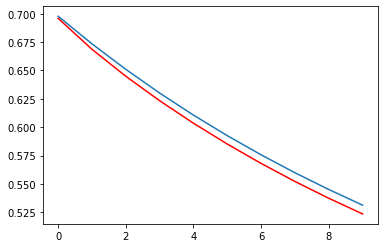

In [24]:
plt.plot(list(range(10)), loss_history)
plt.plot(list(range(10)), loss_history_val, color='r')

plt.show()

In [25]:
check = cost_function_for_log_reg(X_val, y_val, weights, bia)
print(X_val.shape)
print(y_val.shape)
print(check)

(46, 30)
(46,)
0.5235473356004169


In [26]:
sigmoid_out = sigmoid_function(X_val, w, b)
# print(w)
# print(b)
print(sigmoid_out)

[0.3402419  0.40958916 0.37589144 0.45143265 0.37847955 0.40854933
 0.30965002 0.47421477 0.45443936 0.39085727 0.38100521 0.4989046
 0.39347836 0.69946234 0.37897758 0.33682405 0.42297855 0.42581873
 0.56308926 0.59759874 0.30267765 0.35594864 0.73954964 0.44568997
 0.34775082 0.68026478 0.27157646 0.40283019 0.33163447 0.48566744
 0.54502058 0.43226292 0.43810811 0.55143079 0.4302599  0.46871056
 0.49360307 0.47017444 0.37341997 0.41729606 0.4234859  0.35425658
 0.54218729 0.3854748  0.61483428 0.40120734]


In [27]:
#calculate accuracy 
#The F measure (F1 score or F score) is a measure of a test’s accuracy and 
#is defined as the weighted harmonic mean of the precision and recall of the test.

pred_malignant = []


for pred in sigmoid_out:
    
    if pred >= 0.5:
        pred_malignant.append(1)
    else:
        pred_malignant.append(0)        

In [28]:
print(pred_malignant)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


In [29]:
s = 0
n = 0

for i, j in zip(pred_malignant, y_val):
    if i==j:
        s += 1
    else:
        n += 1
        
        
print(s, n)     
accuracy = s/len(y_val)
print(accuracy, len(y_val))

41 5
0.8913043478260869 46


In [30]:
total_pred_pos = pred_malignant.count(1)
print(total_pred_pos)

total_actual_pos = list(y_val).count(1)
print(total_actual_pos)

9
14


In [31]:
true_pos = 0

for i, j in zip(pred_malignant, y_val):
    # if i==1 and j==1:
        
    if i==j==1:
        true_pos += 1
        
print(true_pos)

9


In [36]:
precision = true_pos/total_pred_pos
recall = true_pos/total_actual_pos

print(precision, recall)

f1_score = 2*precision*recall / (precision + recall)
print(f"F1-Score: {f1_score}")

1.0 0.6428571428571429
F1-Score: 0.782608695652174


In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
print(clf.coef_)
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

[[ 1.67527895  1.40946049  1.65631057  1.4116837   0.53098346  0.51043487
   1.33462446  1.85161683  0.27267678 -0.70738409  0.931408   -0.17810154
   0.73007178  0.65938434  0.09638498 -0.40648818 -0.1437661   0.28017182
  -0.15113491 -0.54085068  2.21053984  1.87552759  2.02910272  1.60126492
   1.43343027  0.84066251  1.30096419  2.53491436  1.08494063  0.34900968]]
0.9633251833740831
0.9782608695652174


In [38]:
print(weights)

[ 0.15903958 -0.00898651  0.17149392  0.18751758 -0.12182376  0.13109463
  0.26797357  0.30092466 -0.1084175  -0.1842587   0.10332859 -0.12810008
  0.09758983  0.10094492 -0.13524808  0.01723914  0.01136134  0.00787469
 -0.12242607 -0.04314621  0.2276666   0.00188472  0.22877249  0.21362916
 -0.06352218  0.1418919   0.20446703  0.30633996 -0.0183266  -0.00502417]


In [39]:
#Feature importance obtained from coefficients 

l = list(weights)
print(l)


[0.1590395801149324, -0.008986510866634975, 0.1714939188680011, 0.1875175762777574, -0.12182375546096011, 0.13109463187788842, 0.26797356976257614, 0.3009246602828799, -0.10841749851993641, -0.1842587035774199, 0.10332859371636816, -0.1281000805898496, 0.09758983372335053, 0.10094491884456187, -0.1352480849160319, 0.017239136369949726, 0.011361336034900525, 0.00787469317030515, -0.12242606548953625, -0.04314621101848817, 0.22766659868742328, 0.0018847166587890635, 0.22877248857792012, 0.21362916302583618, -0.06352218193057717, 0.14189189784566014, 0.2044670285273164, 0.30633995533259556, -0.018326595377882813, -0.005024173929181971]


In [40]:
d = pd.DataFrame({"Feature": x_features.columns, "Coeff": l})
print(d.sort_values(by = "Coeff", ascending=True))

                    Feature     Coeff
9    fractal_dimension_mean -0.184259
14            smoothness_se -0.135248
11               texture_se -0.128100
18              symmetry_se -0.122426
4           smoothness_mean -0.121824
8             symmetry_mean -0.108417
24         smoothness_worst -0.063522
19     fractal_dimension_se -0.043146
28           symmetry_worst -0.018327
1              texture_mean -0.008987
29  fractal_dimension_worst -0.005024
21            texture_worst  0.001885
17        concave points_se  0.007875
16             concavity_se  0.011361
15           compactness_se  0.017239
12             perimeter_se  0.097590
13                  area_se  0.100945
10                radius_se  0.103329
5          compactness_mean  0.131095
25        compactness_worst  0.141892
0               radius_mean  0.159040
2            perimeter_mean  0.171494
3                 area_mean  0.187518
26          concavity_worst  0.204467
23               area_worst  0.213629
20          